In [104]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/airbnbopendata/Airbnb_Open_Data.csv


# **Import Data**

In [105]:
df=pd.read_csv('/kaggle/input/airbnbopendata/Airbnb_Open_Data.csv')
pd.set_option('display.max_columns',None)
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,strict,Private room,2020.0,$966,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,moderate,Entire home/apt,2007.0,$142,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,US,True,flexible,Private room,2005.0,$620,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,US,True,moderate,Entire home/apt,2005.0,$368,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,False,moderate,Entire home/apt,2009.0,$204,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


# **Data Cleaning**

# Handle Missing Values 

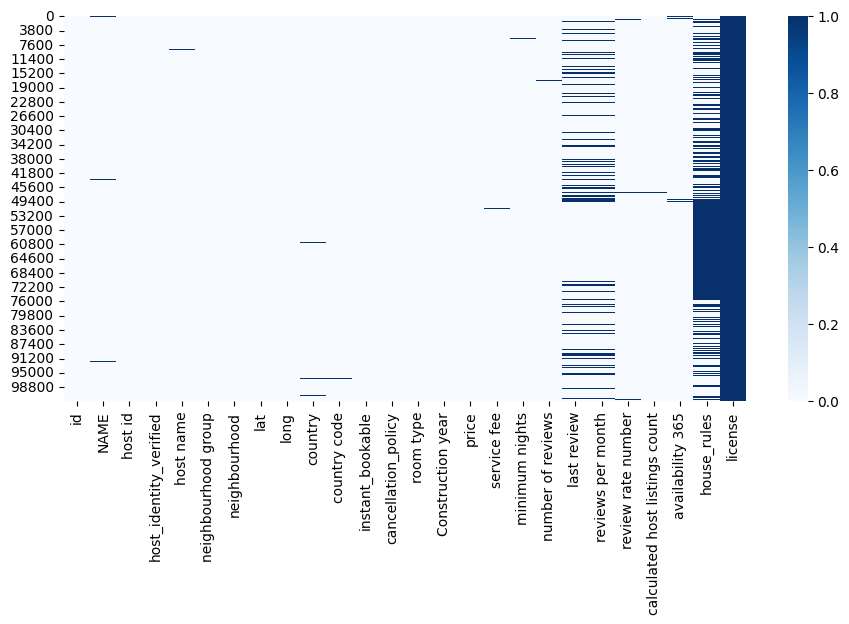

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

In [106]:
# First we look at the missing values in the dataset
plt.figure(figsize=(11,5))
sns.heatmap(df.isna(),cmap='Blues')
plt.show()
print(df.isna().sum())

In [107]:
# as we can see some columns contain too many missing values, so we can just drop them.
# also columns like id,host_id,host name etc. are irrelevant for analysis so we can drop them too
df.drop(['id','host id','license','house_rules','reviews per month','last review','host name','country code'],axis=1,inplace=True)

# rename columns to match a specific format
df.rename(columns={'NAME':'name','host_identity_verified':'host identity','Construction year':'construction year'},inplace=True)
df.head()

,name,host identity,neighbourhood group,neighbourhood,lat,long,country,instant_bookable,cancellation_policy,room type,construction year,price,service fee,minimum nights,number of reviews,review rate number,calculated host listings count,availability 365
0,Clean & quiet apt home by the park,unconfirmed,Brooklyn,Kensington,40.64749,-73.97237,United States,False,strict,Private room,2020.0,$966,$193,10.0,9.0,4.0,6.0,286.0
1,Skylit Midtown Castle,verified,Manhattan,Midtown,40.75362,-73.98377,United States,False,moderate,Entire home/apt,2007.0,$142,$28,30.0,45.0,4.0,2.0,228.0
2,THE VILLAGE OF HARLEM....NEW YORK !,NaN,Manhattan,Harlem,40.80902,-73.94190,United States,True,flexible,Private room,2005.0,$620,$124,3.0,0.0,5.0,1.0,352.0
3,NaN,unconfirmed,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,True,moderate,Entire home/apt,2005.0,$368,$74,30.0,270.0,4.0,1.0,322.0
4,Entire Apt: Spacious Studio/Loft by central park,verified,Manhattan,East Harlem,40.79851,-73.94399,United States,False,moderate,Entire home/apt,2009.0,$204,$41,10.0,9.0,3.0,1.0,289.0


In [108]:
# Analyze missing values in numerical and categorical columns separately
num_cols=df.select_dtypes(include='number').columns
cat_cols=df.select_dtypes(include='object').columns

**1. Handle Missing Values in Numerical Columns**

In [109]:
# fill the missing values with a constant eg: 0
 ##df[num_cols]=df[num_cols].fillna(0) 
 ##df.isna().sum()

In [110]:
# fill missing values with the mean/median of the given column using Univariate Imputation
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='mean') # can also usse median here
df[num_cols]=imputer.fit_transform(df[num_cols])
df.isnull().sum()

name                              250
host identity                     289
neighbourhood group                29
neighbourhood                      16
lat                                 0
long                                0
country                           532
instant_bookable                  105
cancellation_policy                76
room type                           0
construction year                   0
price                             247
service fee                       273
minimum nights                      0
number of reviews                   0
review rate number                  0
calculated host listings count      0
availability 365                    0
dtype: int64

In [111]:
# consider missing values as a target variable and predict them from other given variables using MultiVariate Imputation
  ##from sklearn.impute import KNNImputer
  ##knn=KNNImputer(n_neighbours=5) -- checks the five nearest columns
  ##df[num_cols]=knn.fit_transform(df[num_cols])
  ##df.isna().sum()

In [112]:
# we notice price and service fee columns are object columns ad contain some missing data as well
# thus we fill in the missing data and convert the object columns to numerical columns
df['price']=df['price'].fillna(0)
df['service fee']=df['service fee'].fillna(0)

# Remove currency symbols and commas
df['price'] = df['price'].replace({'\$': '', ',': ''}, regex=True)
df['service fee'] = df['service fee'].replace({'\$': '', ',': ''}, regex=True)

# Convert to integers
df['price'] = df['price'].astype(float)
df['service fee'] = df['service fee'].astype(float)

df.dtypes

name                               object
host identity                      object
neighbourhood group                object
neighbourhood                      object
lat                               float64
long                              float64
country                            object
instant_bookable                   object
cancellation_policy                object
room type                          object
construction year                 float64
price                             float64
service fee                       float64
minimum nights                    float64
number of reviews                 float64
review rate number                float64
calculated host listings count    float64
availability 365                  float64
dtype: object

**2. Handle Mising Values in Categorical Columns**

In [113]:
# for categorical data, we usually impute the column with the most frequent value in the column
imputer=SimpleImputer(strategy='most_frequent')
df[cat_cols]=imputer.fit_transform(df[cat_cols])
df.isna().sum()

name                              0
host identity                     0
neighbourhood group               0
neighbourhood                     0
lat                               0
long                              0
country                           0
instant_bookable                  0
cancellation_policy               0
room type                         0
construction year                 0
price                             0
service fee                       0
minimum nights                    0
number of reviews                 0
review rate number                0
calculated host listings count    0
availability 365                  0
dtype: int64

In [114]:
# we can also fill the missing values with placeholders like 'Missing' or 'Unknown'
 ##df['category'].fillna('Unknown', inplace=True)
 ##df.isna().sum()

# Remove Duplicates

In [115]:
# first we see how many duplicate rows are present

# now we drop the duplicate rows from the dataset
   ## df=df.drop_duplicates() --- this code deletes all the duplicated rows
    
df=df.drop_duplicates(keep='first') # this code keeps the firsst occurence and deletes the rest


# Handle Categorical Data

In [116]:
# this is done usually wehn we want to train a machine learning model on our data set
# in this guide we are not focusing on model training, still i will show you the basics of encoding

# Label Encoding
 ## from sklearn.preprocessing import LabelEncoder
    ## le=LabelEncoder()
    ## df[categorical_column]=le.fit_transform(df[categorical_column])
    
# One Hot Encoding (preffered)
 ## pd.get_dummies(df,categorical_columns)
    
# Ordinal Encoding
 ## from sklearn.preprocessing import OrdinalEncoder
    ##categories = [['bad', 'good', 'excellent']]
    ## encoder=OrdinalEncoder(categories=categories)
    ## df[categorical_column]=encoder.fit_transform(df[categorical_column])--- this encodes bad :0 ,good:1 ,excellent:2

# Map Function
 ## simplest way to encode categorical data
 ## df['color']=df['color'].map({'blue':0,'green':1})-- encodes blue as 0 and green as 1

# Handle Outliers

In [117]:
# if data< (IQR-q1*1.5) or data>(IQR+q3*1.5)-- outlier
# or we can define a custom criteria to classify outliers

lower_cap=df['price'].quantile(0.01) #-- set lower cap as 1st percentile
upper_cap=df['price'].quantile(0.99) # -- set upper cap as 99th percentile
df['price']=df['price'].clip(lower_cap,upper_cap)


# **Data Visualization**

# Distribution Plots

**1. Histogram**

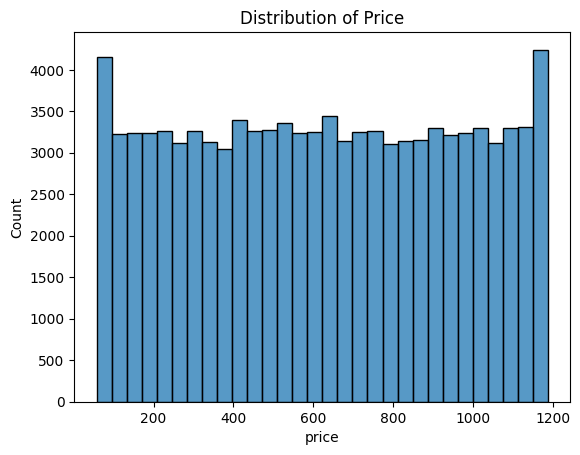

In [118]:
#Useful for showing the distribution of a single numeric variable.
sns.histplot(df['price'],bins=30)
plt.title('Distribution of Price')
plt.show()
# from this plot we can say that for each price we have roughly 3000-3500 houses

**Kernel Density Distribution**

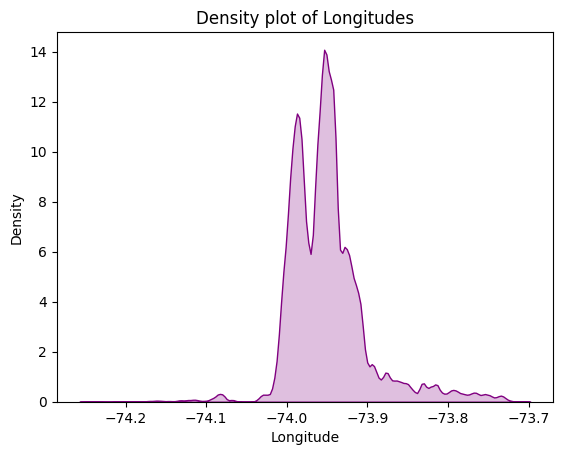

In [119]:
#Shows the probability density of a continuous variable.
sns.kdeplot(df['long'],fill=True,bw_adjust=0.5,color='purple')
plt.title('Density plot of Longitudes')
plt.xlabel('Longitude')
plt.show()
# from this plot we can infer that the maximum no. of airbnb have been built in the Longitude range of -74.1 to -73.7

**BoxPlot**

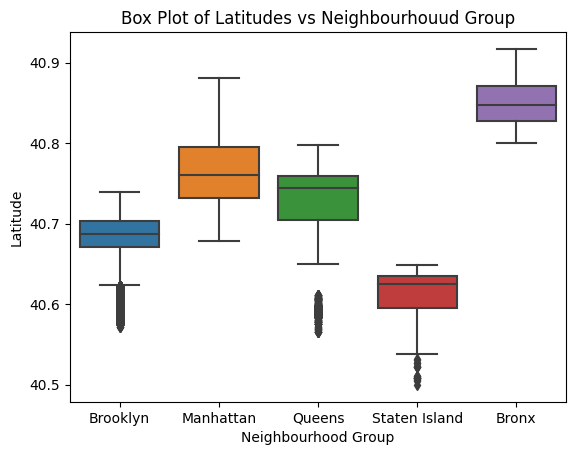

In [120]:
# Useful for plotting the distribution of a variable ,identify the quantiles in the distribution and find the outliers
replace={'brookln':'Brooklyn','manhatan':'Manhattan'}
df['neighbourhood group']=df['neighbourhood group'].replace(replace)
sns.boxplot(x='neighbourhood group', y='lat', data=df)
plt.title('Box Plot of Latitudes vs Neighbourhouud Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Latitude')
plt.show()
# from this plot we conclude that the median Latitude of airbnb in Queens neighbourhood is roughly 40.75 and that the Queens neighbourhood contains many outliers

**4. Violin Plot**

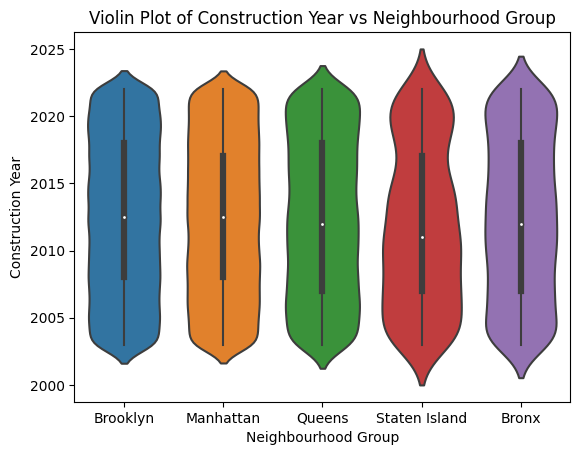

In [121]:

sns.violinplot(x='neighbourhood group',y='construction year',data=df)
plt.xlabel('Neighbourhood Group')
plt.ylabel('Construction Year')
plt.title('Violin Plot of Construction Year vs Neighbourhood Group')
plt.show()
# from this plot we can say that the median construction year of airbnbs in each neighbourhood is roughly the same and is equal to 2012

# Relationship Plots

**1. Scatter Plots**

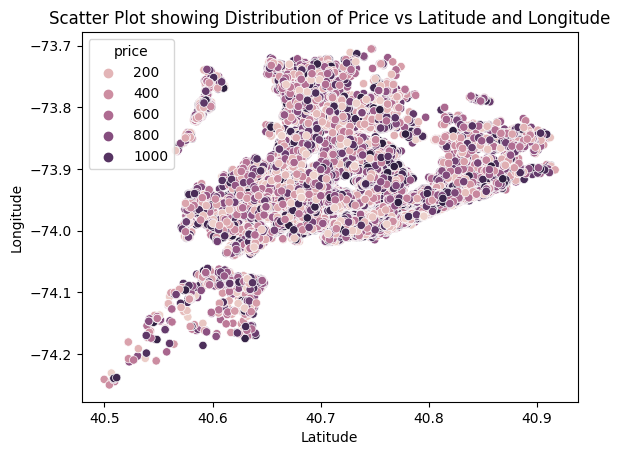

In [122]:
sns.scatterplot(x='lat',y='long',hue='price',data=df)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Scatter Plot showing Distribution of Price vs Latitude and Longitude')
plt.show()
# this plot shows the variation of price with changes in both latitude and longitude

**2. Lineplot**

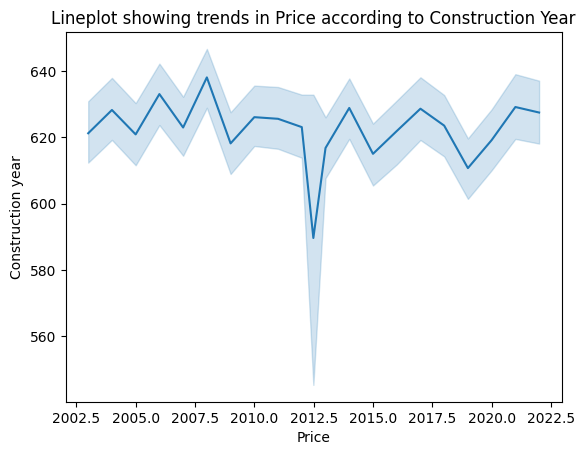

In [132]:
# Useful for time series data to show trends over time.
sns.lineplot(x='construction year', y='price', data=df)
plt.title('Lineplot showing trends in Price according to Construction Year')
plt.xlabel('Price')
plt.ylabel('Construction year')
plt.show()
# this plot shows the trend of airbnb prices according to their construction year

**3. Pairplot**

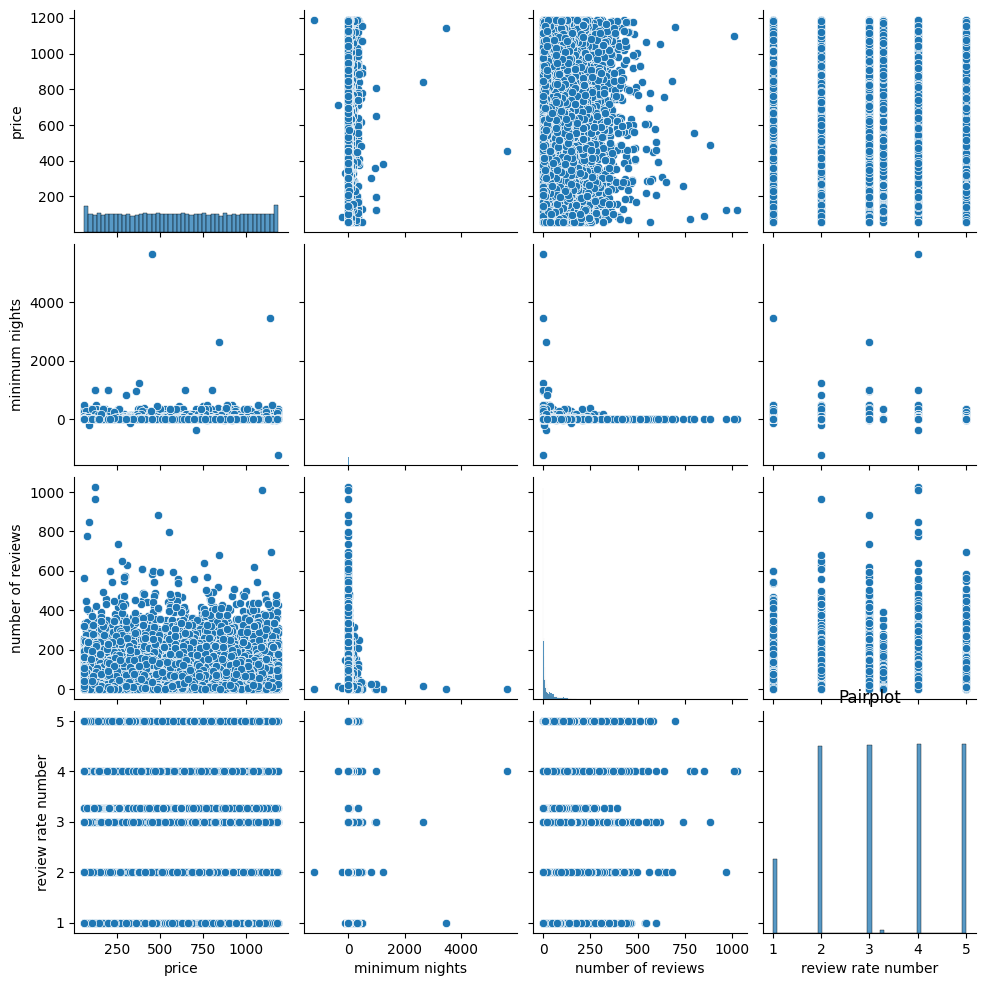

In [131]:
sns.pairplot(df[['price', 'minimum nights', 'number of reviews', 'review rate number']])
plt.title('Pairplot')
plt.show()
# Use to show the relations between various numerical variables

# Categorical Plots

**1. Bar Plot**

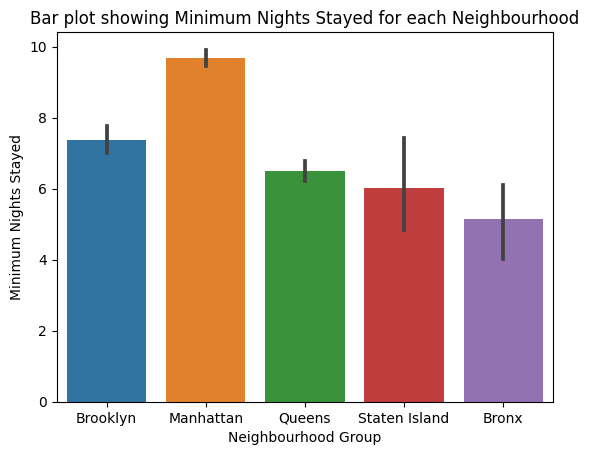

In [134]:
# Use to show plots for categorical data
sns.barplot(x='neighbourhood group', y='minimum nights', data=df)
plt.title('Bar plot showing Minimum Nights Stayed for each Neighbourhood')
plt.ylabel('Minimum Nights Stayed')
plt.xlabel('Neighbourhood Group')
plt.show()
# from this plot we can find out the mean Minimum Number of Nights stayed for each Neighbourhood Group


# Distrbution of Multiple Variables

**1. Heatmap**

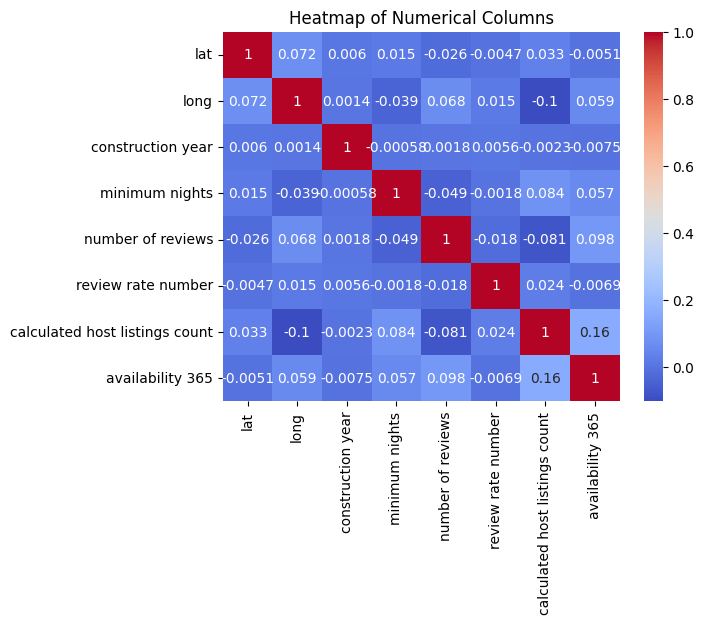

In [142]:
numerical_data = df.select_dtypes(include=[np.number])
correlation_matrix = numerical_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap of Numerical Columns')
plt.show()
# Visualizes the correlation matrix of the dataset.